<a href="https://colab.research.google.com/github/noahruiz416/INTC_Stock_Model/blob/main/INTEL_Stock_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook contains the exploratory analysis I conducted in order to create a model that predicts INTC stock prices. This analysis follows a dimensionality reduction process that was conducted prior, throguh a stepwise regression process. 

##### (Before running load df into cloud memory)

### First, we must explore INTC before conducting further EDA

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_excel('stoink_final.xlsx')

In [ ]:
df_new = df[['Date', 'INTC', 'ORCL', 'NVDA', 'QCOM', 'AMD', 'MU', 'TXN', 'TSLA', 'SWKS', 'CTXS']]
norm_new = (df_new[['INTC', 'ORCL', 'NVDA', 'AMD', 'QCOM', 'MU', 'TXN' ,'TSLA', 'SWKS', 'CTXS']]-df_new[['INTC', 'ORCL', 'NVDA', 'AMD', 'QCOM', 'MU', 'TXN', 'TSLA', 'SWKS', 'CTXS']].mean())/(df_new[['INTC', 'ORCL', 'NVDA', 'AMD', 'QCOM', 'MU', 'TXN', 'TSLA', 'SWKS','CTXS']].std())

In [ ]:
df['INTC'].describe()

count    253.000000
mean      53.408300
std        4.383200
min       44.400002
25%       50.310001
50%       53.619999
75%       55.910000
max       68.260002
Name: INTC, dtype: float64

Text(0.5, 1.0, 'Stock Prices Intel 03/21 - 03/22')

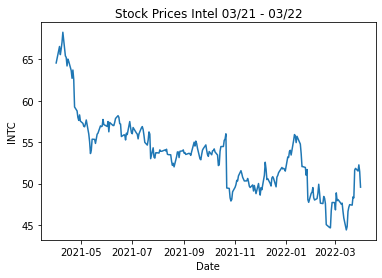

In [ ]:
lineplot_Intel = sns.lineplot(x = 'Date', y = 'INTC', data = df)
lineplot_Intel.set_title('Stock Prices Intel 03/21 - 03/22')

Text(0.5, 1.0, 'Stock Price Data Distribution Intel')

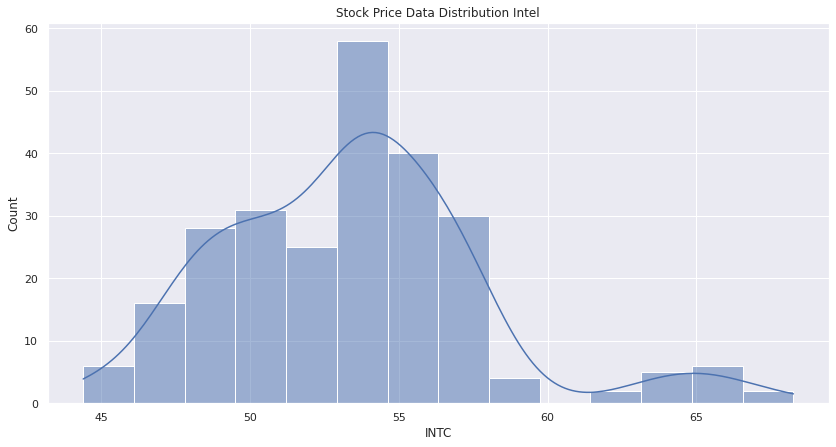

In [ ]:
hist_intel = sns.histplot(data = df, x = 'INTC', kde = True)
hist_intel.set_title("Stock Price Data Distribution Intel")

## Time Series Plots for the semiconductor Industry aggregate results, we can see that NVIDIA, AMD and QCOM move in tandem as they all specialize in graphics chips. Intel and Oracle however have a relatively inverse realtionship

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


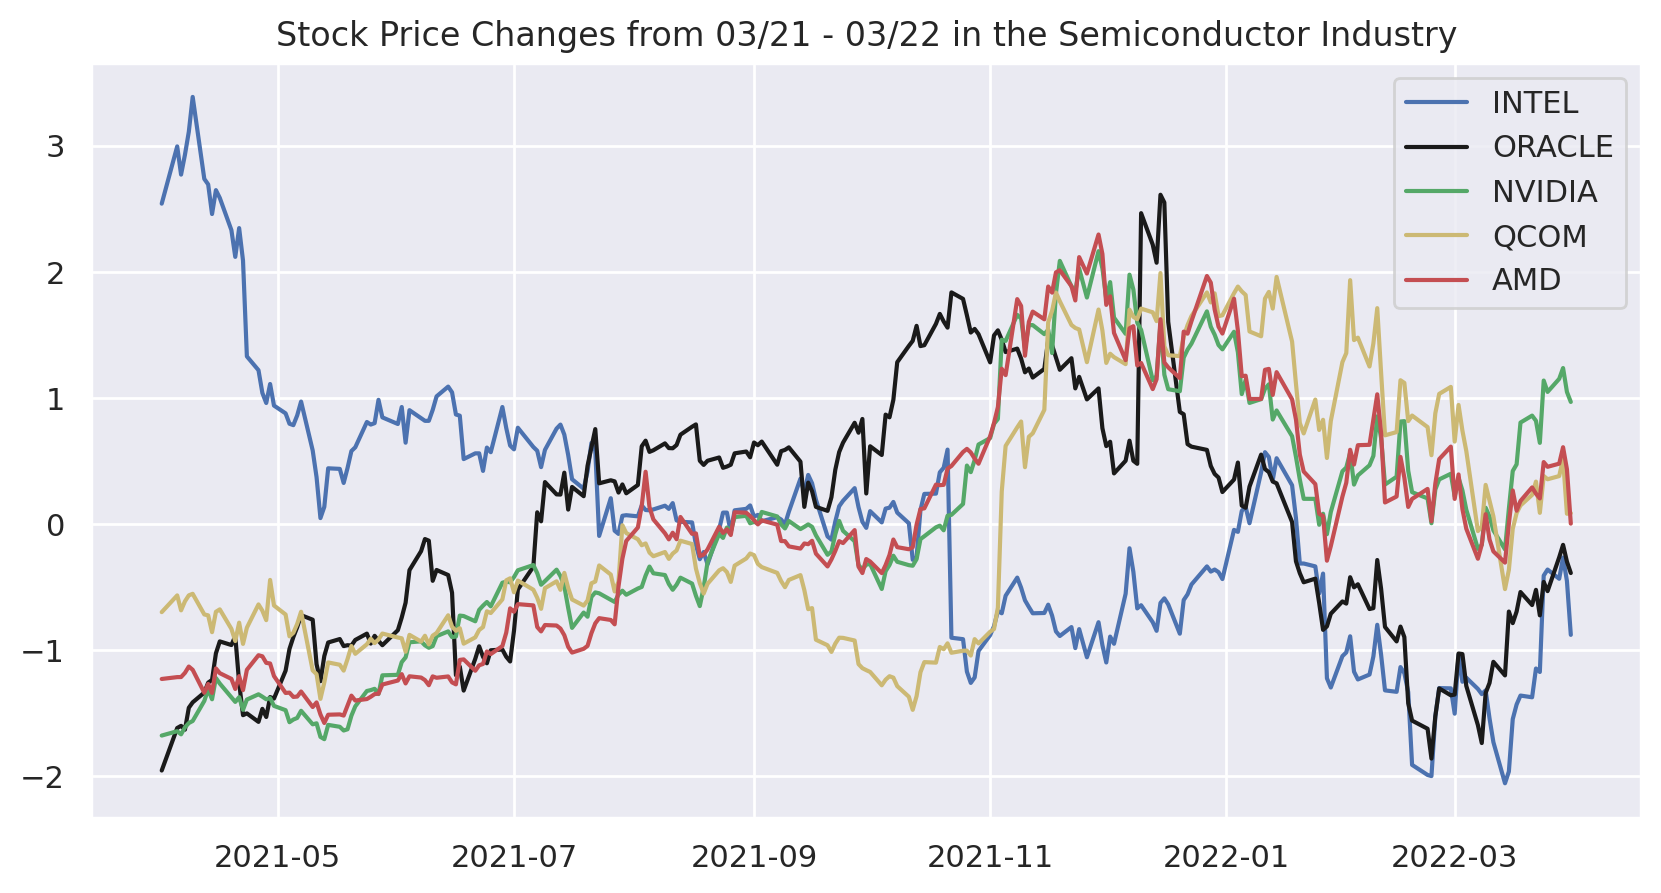

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 5), dpi=200)

X = df_new['Date']
Y1 = norm_new['INTC']
Y2 = norm_new['ORCL']
Y3 = norm_new['NVDA']
Y4 = norm_new['QCOM']
Y5 = norm_new['AMD']

plt.plot(X,Y1,color='B')
plt.plot(X,Y2,color='K')
plt.plot(X,Y3,color='G')
plt.plot(X,Y4,color='Y')
plt.plot(X,Y5,color='R')


ocation = 0 # For the best location
legend_drawn_flag = True
plt.legend(["INTEL", "ORACLE", "NVIDIA", "QCOM", "AMD"], loc=0, frameon=legend_drawn_flag)
plt.title("Stock Price Changes from 03/21 - 03/22 in the Semiconductor Industry")

plt.show()

#### As mentioned above, Oracle and Intel seem to have a inverse relationship when analyzed on a time-series basis, however recent events with the semiconductor crisis and Ukraine have caused recent pricefalls across the board

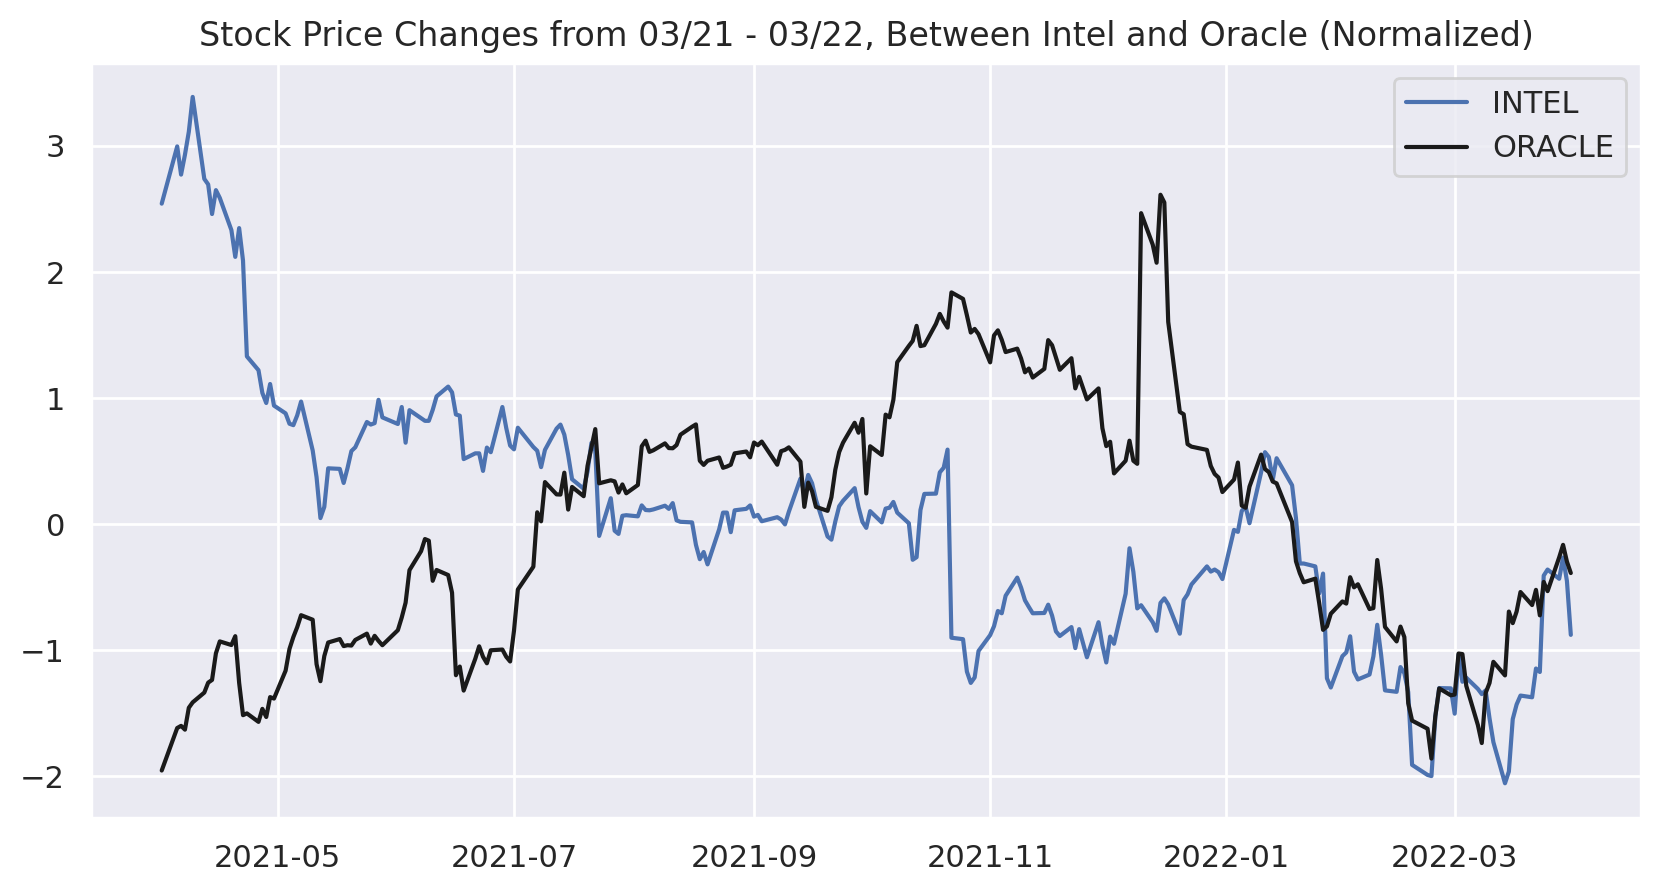

In [ ]:
figure(figsize=(10, 5), dpi=200)

X = df_new['Date']
Y1 = norm_new['INTC']
Y2 = norm_new['ORCL']

plt.plot(X,Y1,color='B')
plt.plot(X,Y2,color='K')

ocation = 0 # For the best location
legend_drawn_flag = True
plt.legend(["INTEL", "ORACLE"], loc=0, frameon=legend_drawn_flag)
plt.title("Stock Price Changes from 03/21 - 03/22, Between Intel and Oracle (Normalized)")

plt.show()

Text(0.5, 1.0, 'Heatmap of the Semiconductor / GPU Industry Competitors')

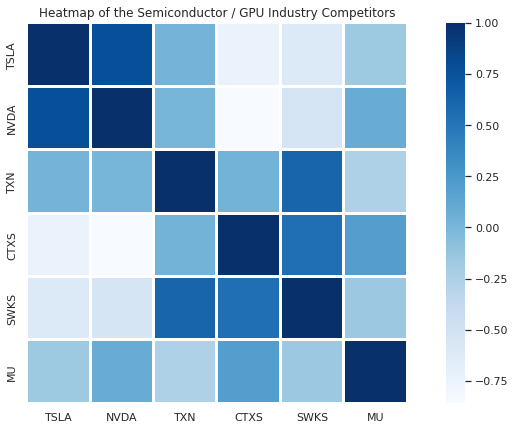

In [ ]:
corr = norm_new[['TSLA', 'NVDA', 'TXN', 'CTXS', 'SWKS','MU']].corr()

sns.set(rc = {'figure.figsize':(14,7)})
x = sns.heatmap(data = corr, cmap='Blues', linewidth=2, square=True)
x.set_title("Heatmap of the Semiconductor / GPU Industry Competitors")

## Now we will analyze the competitors themselves en Masse, to see if there are anymore underlying patterns

### It is clear that the distribution of stock prices for all three seems to be somewhat normal. Addiitonally all compeititors of INTC follow a similar pattern with large amounts of variation in the upper tail. The one stock that does stand out is QCOM, with a very significant skew to the right.

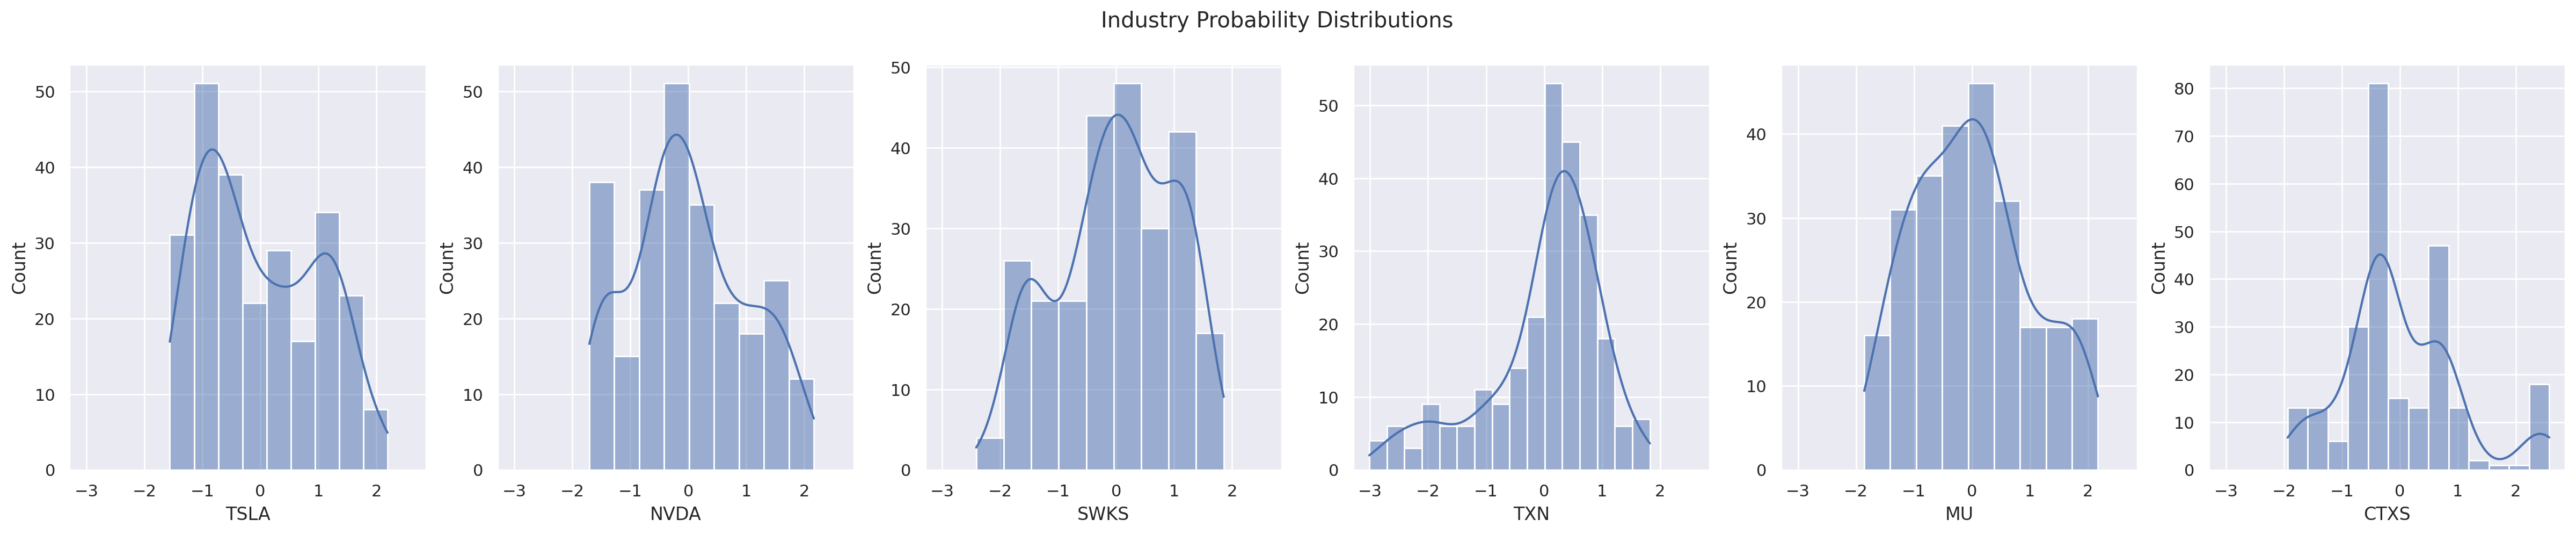

In [ ]:
#this block of code creates a large summation of the plots created above
figure, axes = plt.subplots(1, 6, sharex=True, figsize=(30,5), dpi =200)
figure.suptitle('Industry Probability Distributions')
sns.set_style("darkgrid")
sns.histplot(ax=axes[0], data=norm_new, x='TSLA', kde= True)
sns.histplot(ax=axes[1], data=norm_new, x='NVDA', kde= True)
sns.histplot(ax=axes[2], data=norm_new, x='SWKS', kde= True)
sns.histplot(ax=axes[3], data=norm_new, x='TXN', kde= True)
sns.histplot(ax=axes[4], data=norm_new, x='MU', kde= True)
sns.histplot(ax=axes[5], data=norm_new, x='CTXS', kde= True)

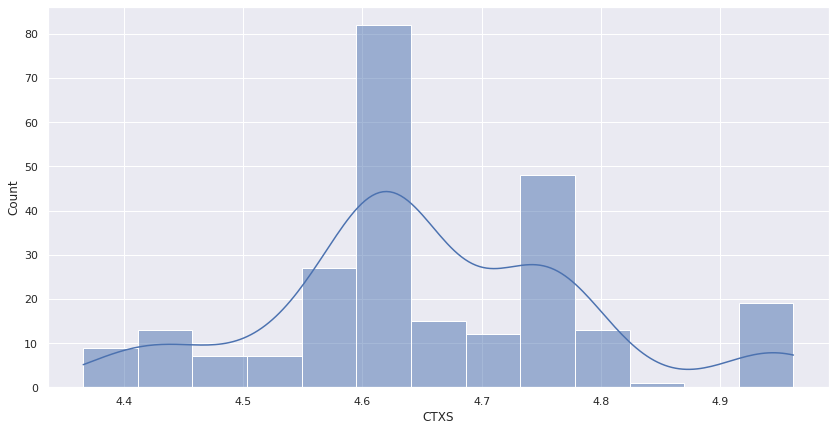

In [ ]:
sns.histplot(data=df_new, x=np.log(df_new['CTXS']), kde= True)

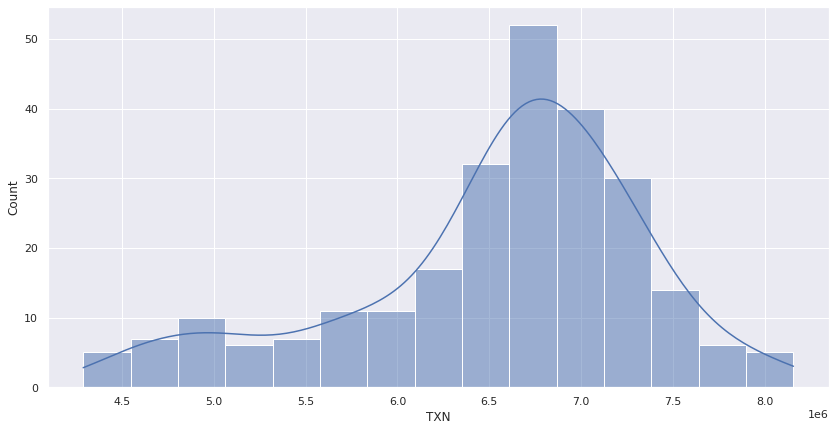

In [ ]:
sns.histplot(data=df_new, x=df_new['TXN'] * df_new['TXN'] * df_new['TXN'], kde= True)

### Outliers appear in the TXN stock ticker

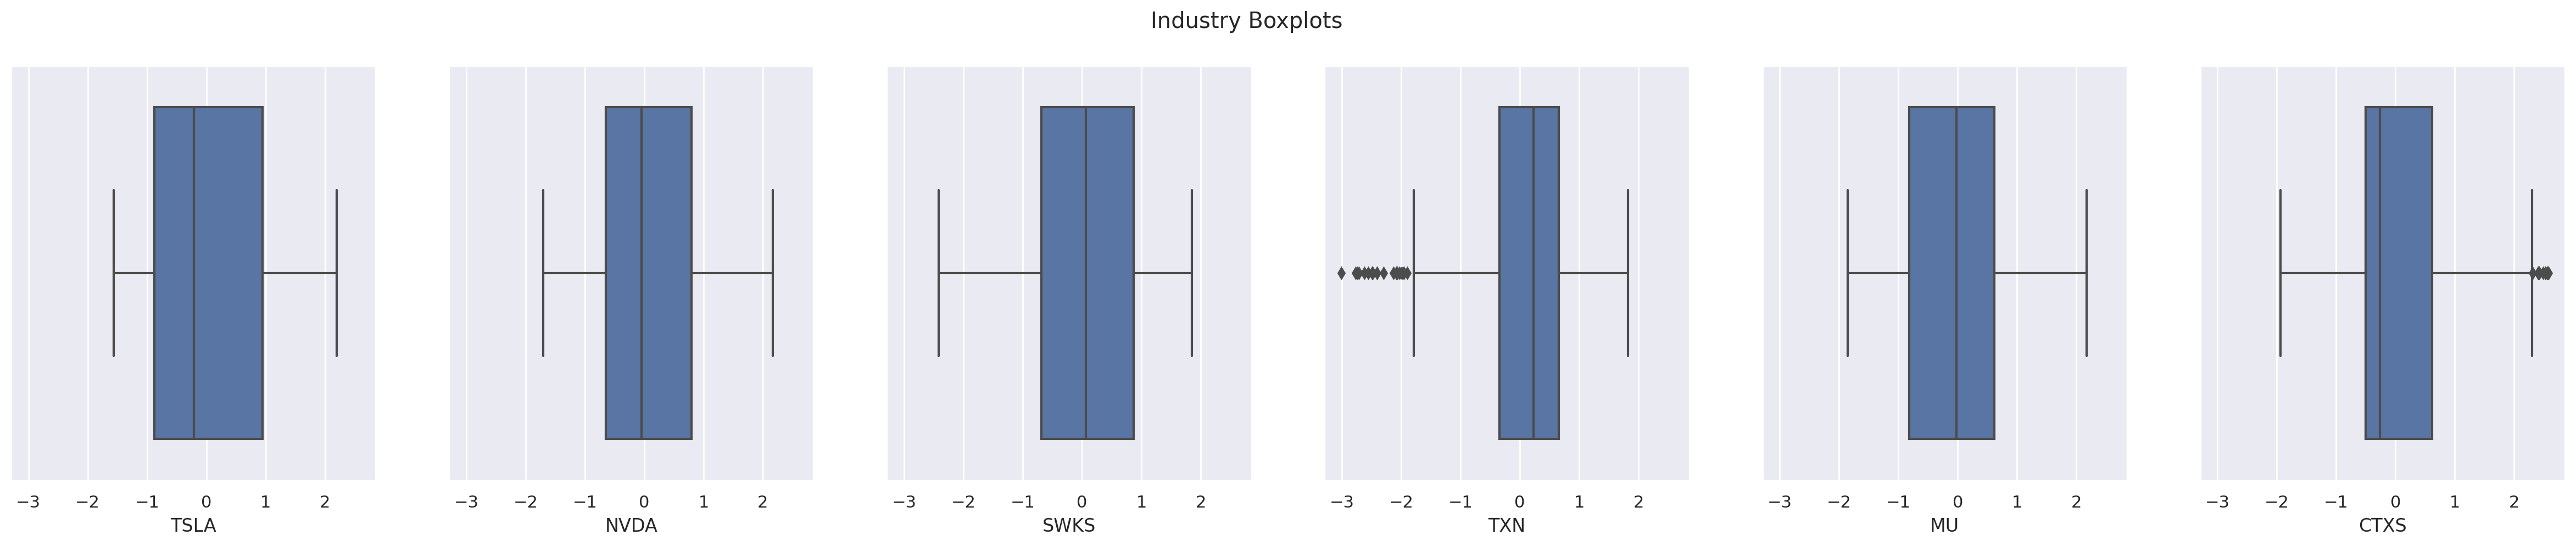

In [ ]:
sns.set_style("darkgrid")
figure, axes = plt.subplots(1, 6, sharex=True, figsize=(30,5), dpi =200)
figure.suptitle('Industry Boxplots')
sns.boxplot(ax=axes[0], data=norm_new, x='TSLA')
sns.boxplot(ax=axes[1], data=norm_new, x='NVDA')
sns.boxplot(ax=axes[2], data=norm_new, x='SWKS')
sns.boxplot(ax=axes[3], data=norm_new, x='TXN')
sns.boxplot(ax=axes[4], data=norm_new, x='MU')
sns.boxplot(ax=axes[5], data=norm_new, x='CTXS')

### Strong realtionships between INTEL prices and each of the competitors seem to be realitvely random, however there does seem to be a somewhat negative realtionship between INTC and all four competitors

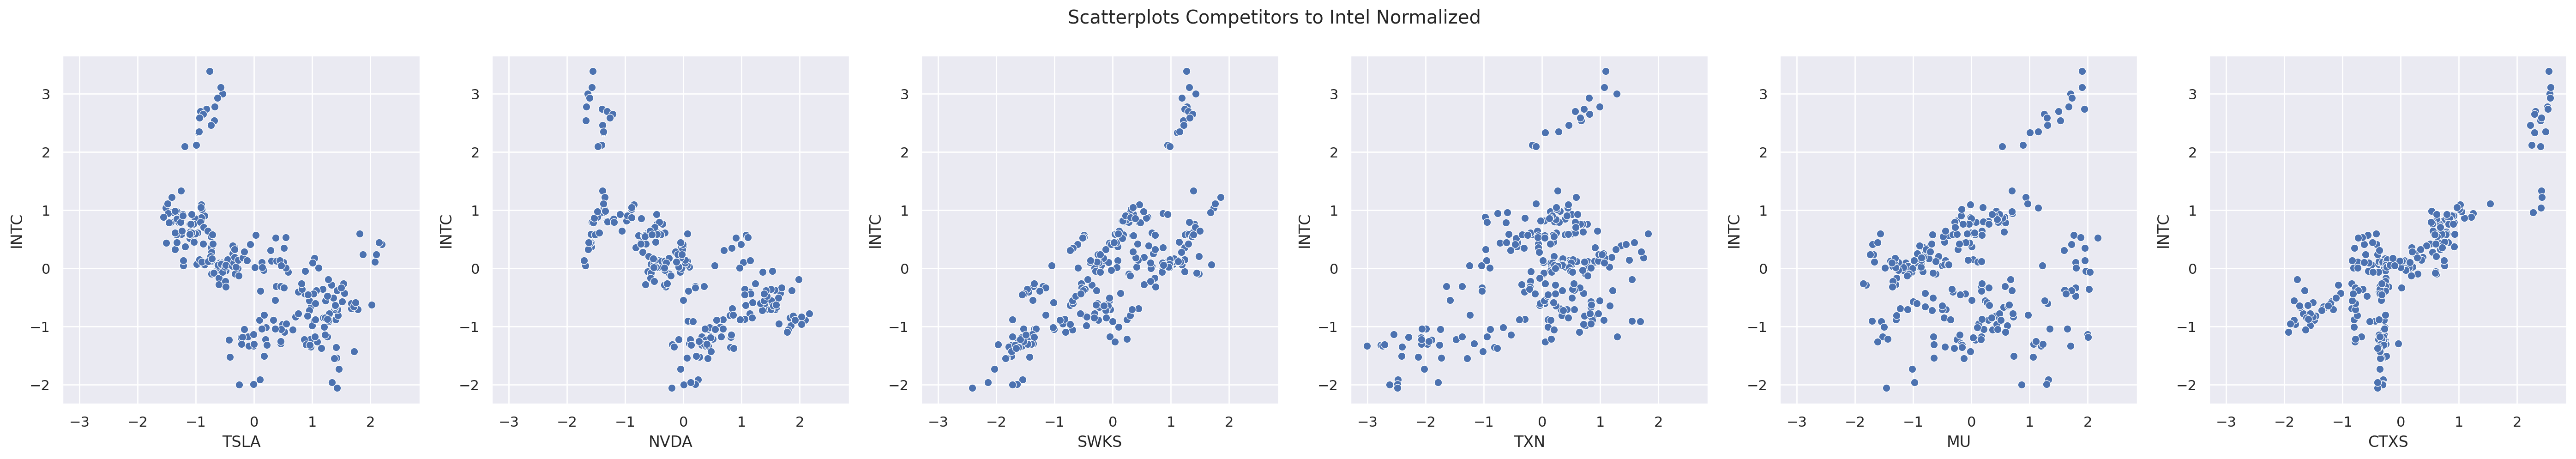

In [ ]:
sns.set_style("darkgrid")
figure, axes = plt.subplots(1, 6, sharex=True, figsize=(35,5), dpi= 200)
figure.suptitle('Scatterplots Competitors to Intel Normalized')
sns.scatterplot(ax=axes[0], data=norm_new, x='TSLA', y = 'INTC')
sns.scatterplot(ax=axes[1], data=norm_new, x='NVDA', y= 'INTC')
sns.scatterplot(ax=axes[2], data=norm_new, x='SWKS', y = 'INTC')
sns.scatterplot(ax=axes[3], data=norm_new, x='TXN', y = 'INTC')
sns.scatterplot(ax=axes[4], data=norm_new, x='MU', y = 'INTC')
sns.scatterplot(ax=axes[5], data=norm_new, x='CTXS', y = 'INTC')

In [ ]:
# we can confrim this with a correlation matrix
norm_new.corrwith(norm_new['INTC'])

INTC    1.000000
ORCL   -0.274826
NVDA   -0.669616
AMD    -0.624360
QCOM   -0.495662
MU      0.216692
TXN     0.472467
TSLA   -0.599720
SWKS    0.736416
CTXS    0.794972
dtype: float64

## In this section, I retierate through the EDA process, this time focusing on Texas Instruments, Micron Technology and Nvidia

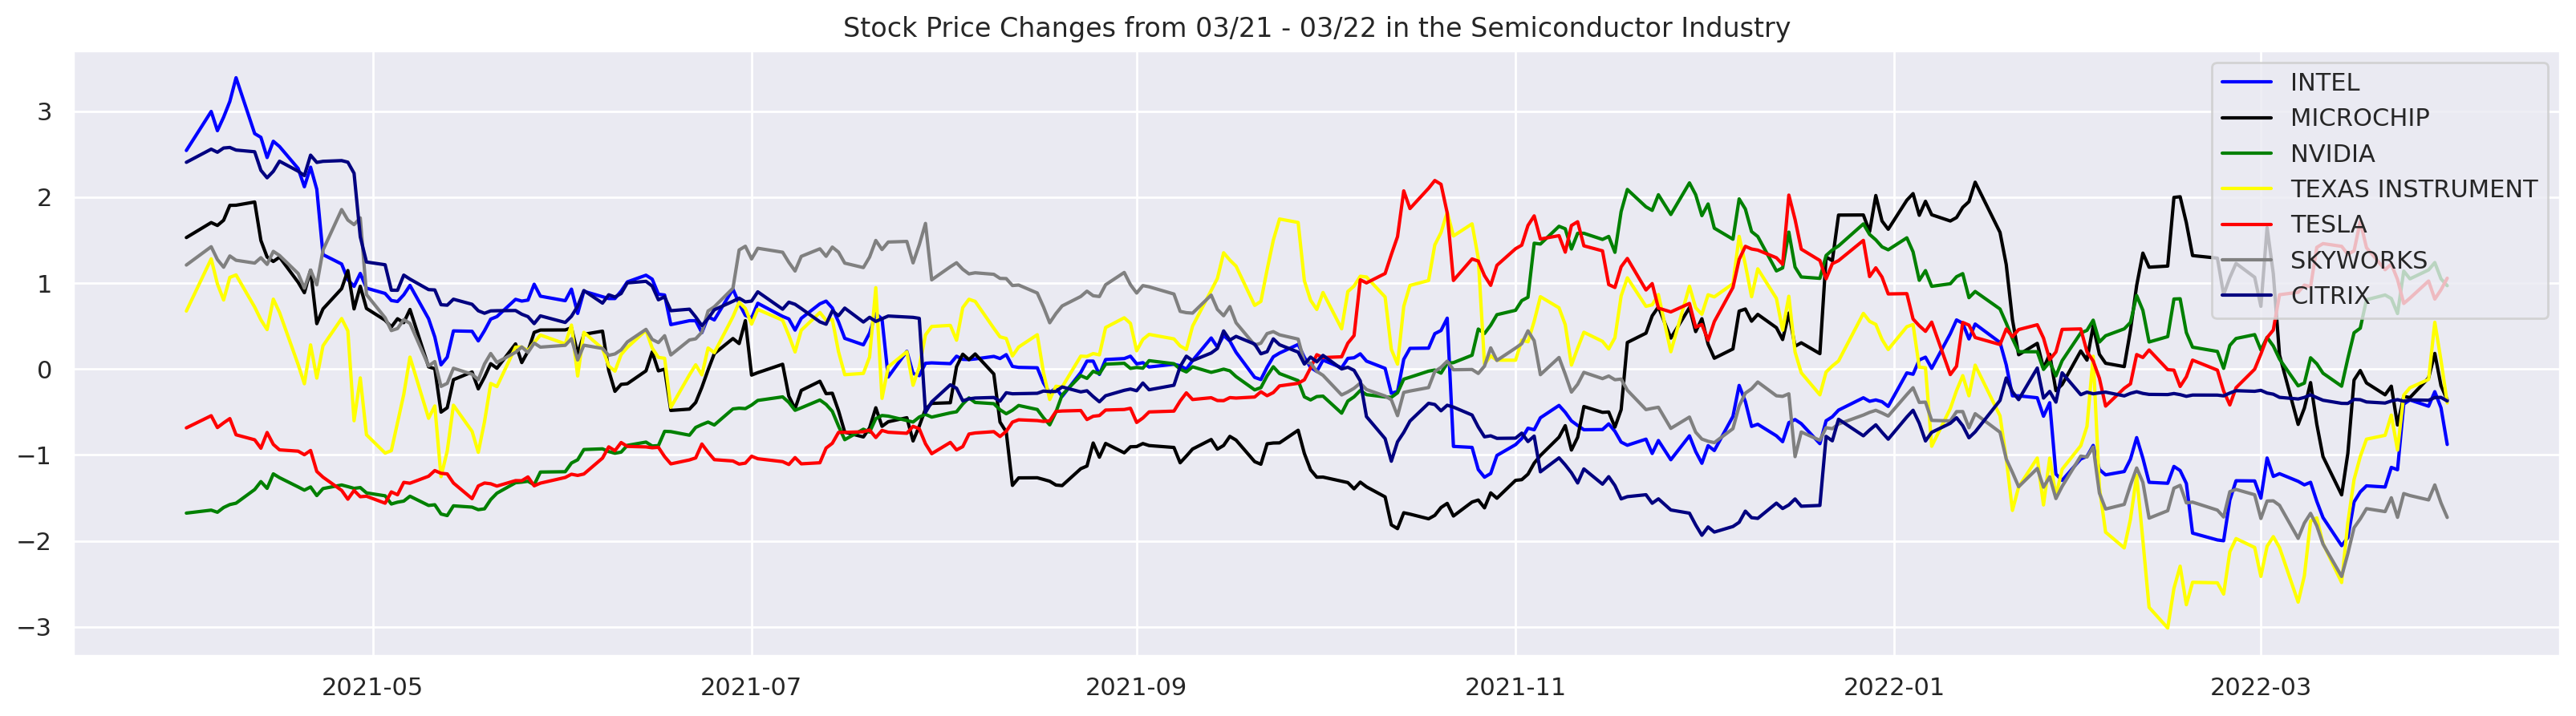

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(20, 5), dpi=200)

X = df_new['Date']
Y1 = norm_new['INTC']
Y2 = norm_new['MU']
Y3 = norm_new['NVDA']
Y4 = norm_new['TXN']
Y5 = norm_new['TSLA']
Y6 = norm_new['SWKS']
Y7 = norm_new['CTXS']



plt.plot(X,Y1,color='Blue')
plt.plot(X,Y2,color='Black')
plt.plot(X,Y3,color='Green')
plt.plot(X,Y4,color='Yellow')
plt.plot(X,Y5,color='Red')
plt.plot(X,Y6,color='Gray')
plt.plot(X,Y7,color='Navy')


ocation = 0 # For the best location
legend_drawn_flag = True
plt.legend(["INTEL", "MICROCHIP", "NVIDIA", "TEXAS INSTRUMENT", "TESLA", "SKYWORKS", "CITRIX"], loc=0, frameon=legend_drawn_flag)
plt.title("Stock Price Changes from 03/21 - 03/22 in the Semiconductor Industry")

plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


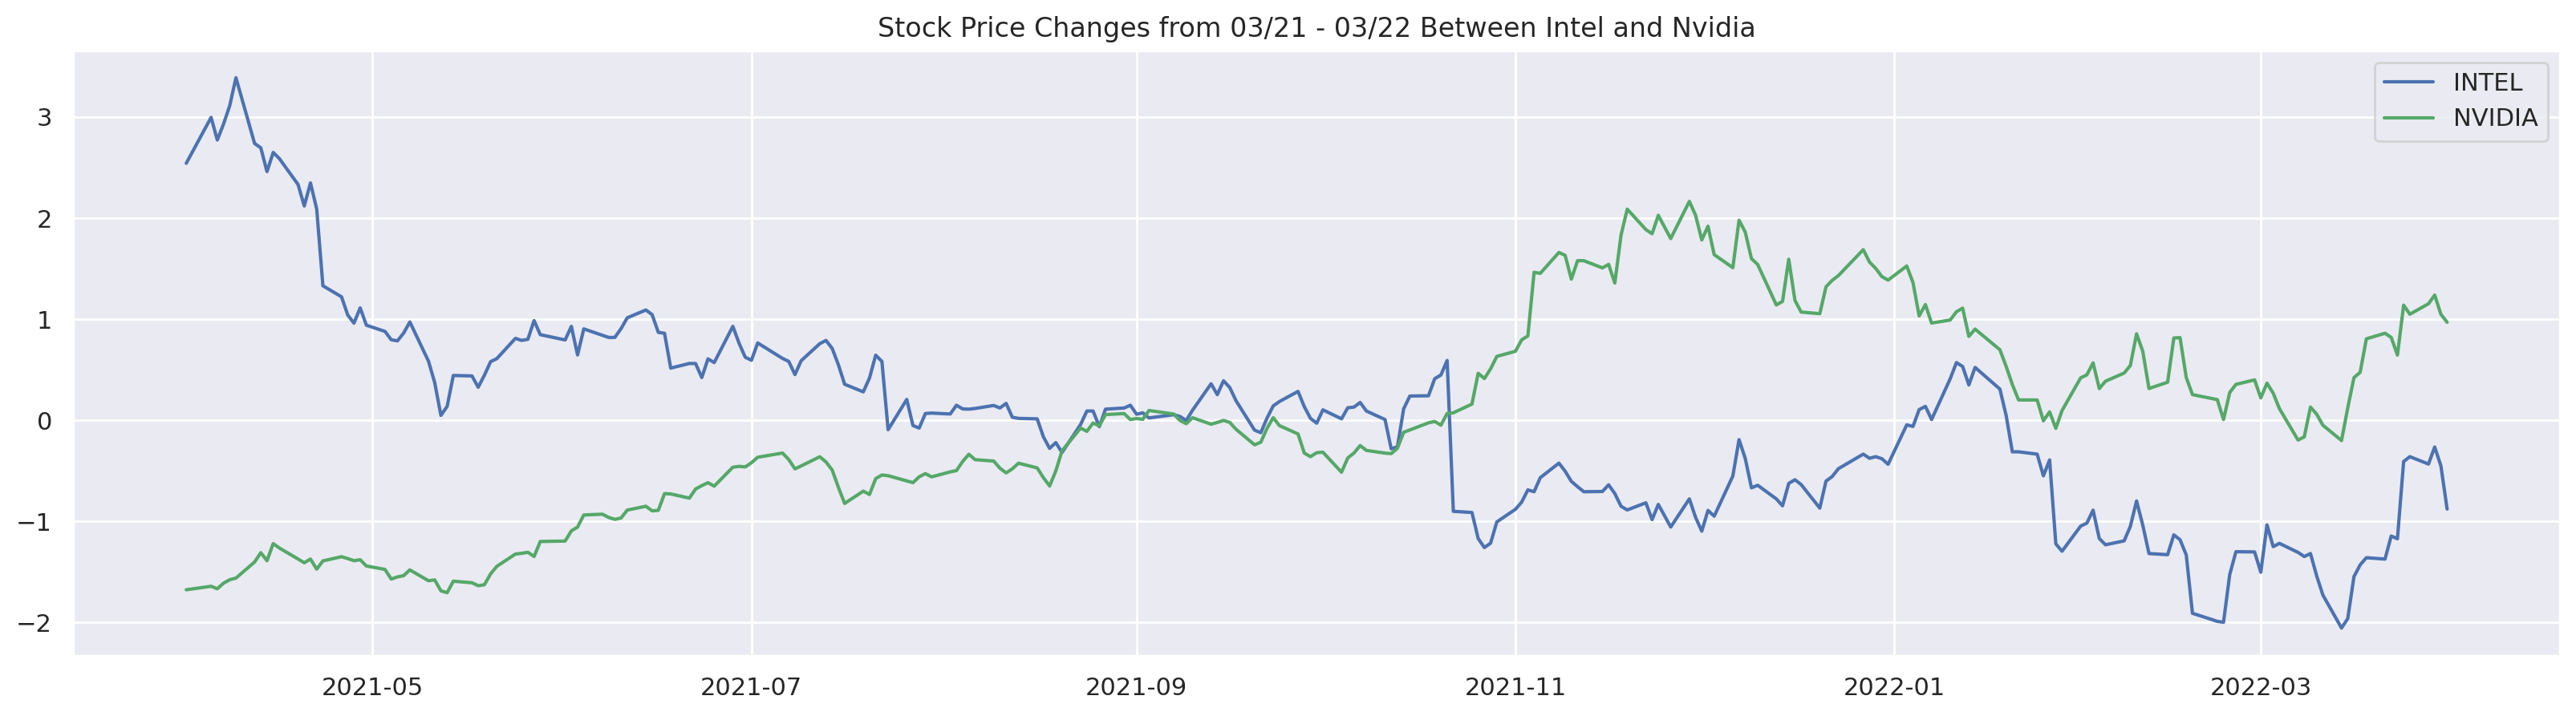

In [ ]:
figure(figsize=(20, 5), dpi=200)

X = df_new['Date']
Y1 = norm_new['INTC']
Y3 = norm_new['NVDA']


plt.plot(X,Y1,color='B')
plt.plot(X,Y3,color='G')



ocation = 0 # For the best location
legend_drawn_flag = True
plt.legend(["INTEL", "NVIDIA"], loc=0, frameon=legend_drawn_flag)
plt.title("Stock Price Changes from 03/21 - 03/22 Between Intel and Nvidia")

plt.show()

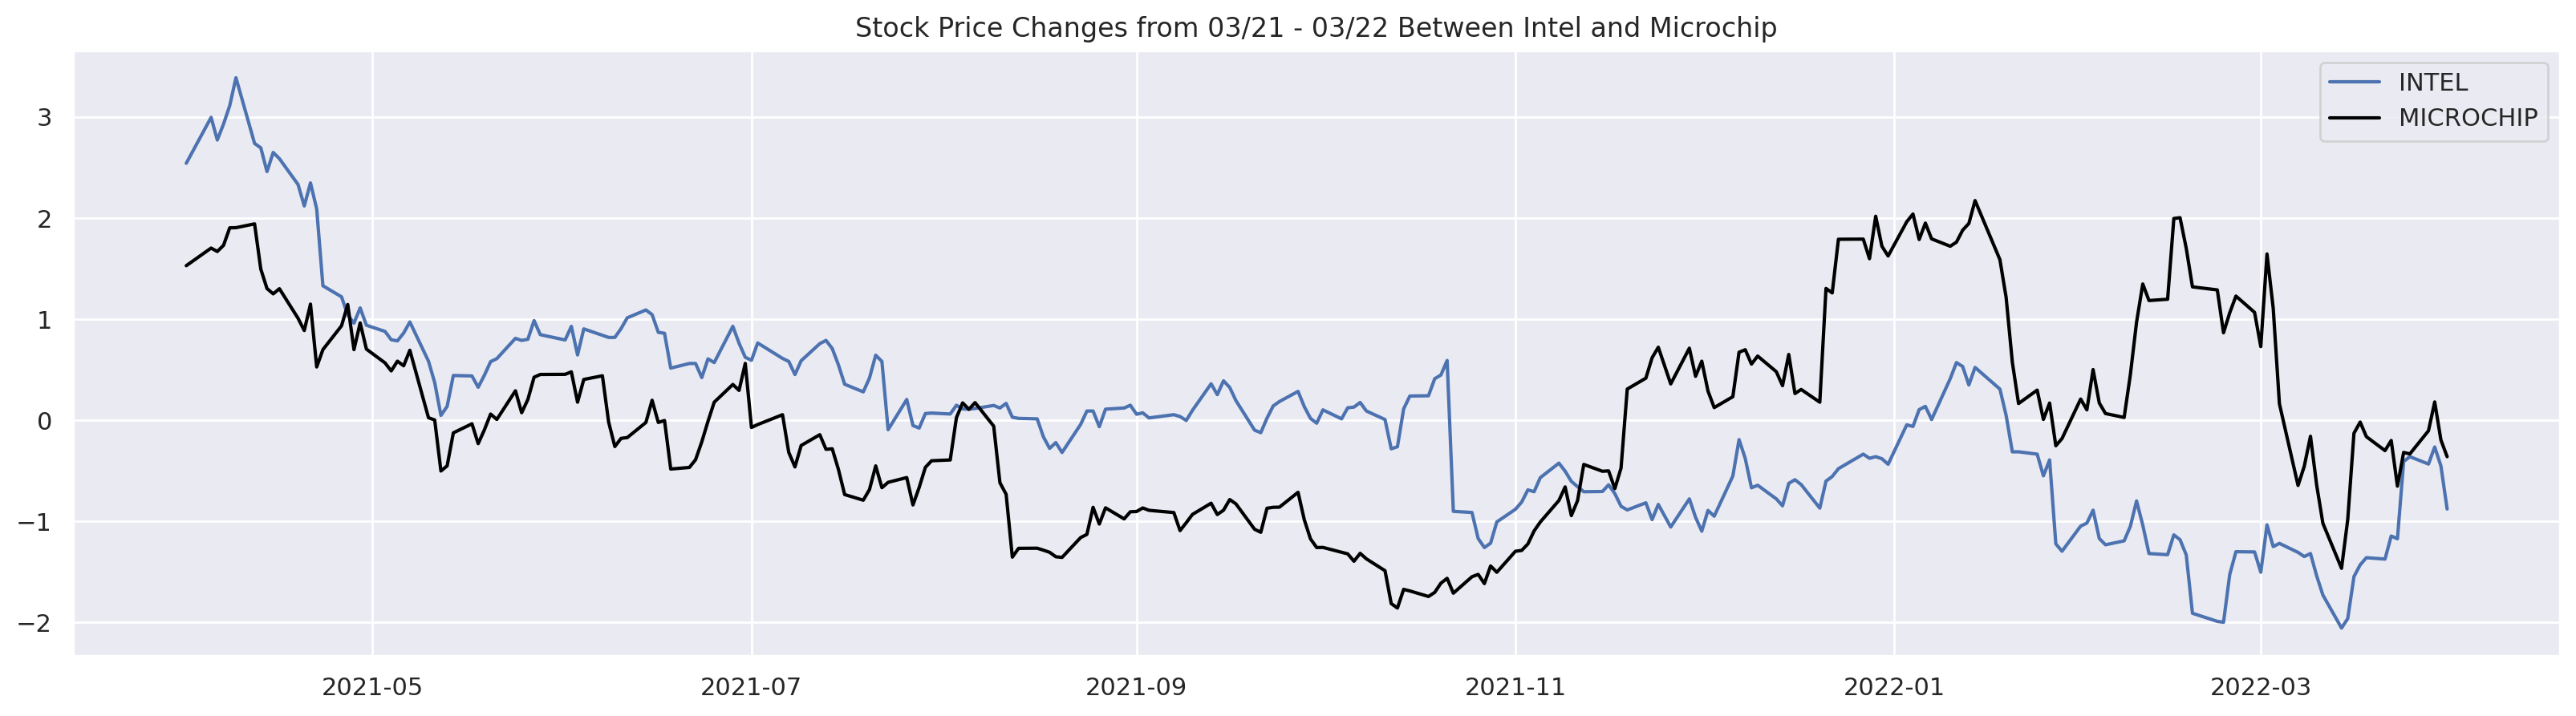

In [ ]:
figure(figsize=(20, 5), dpi=200)

X = df_new['Date']
Y1 = norm_new['INTC']
Y2 = norm_new['MU']


plt.plot(X,Y1,color='B')
plt.plot(X,Y2,color='Black')



ocation = 0 # For the best location
legend_drawn_flag = True
plt.legend(["INTEL", "MICROCHIP"], loc=0, frameon=legend_drawn_flag)
plt.title("Stock Price Changes from 03/21 - 03/22 Between Intel and Microchip")

plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


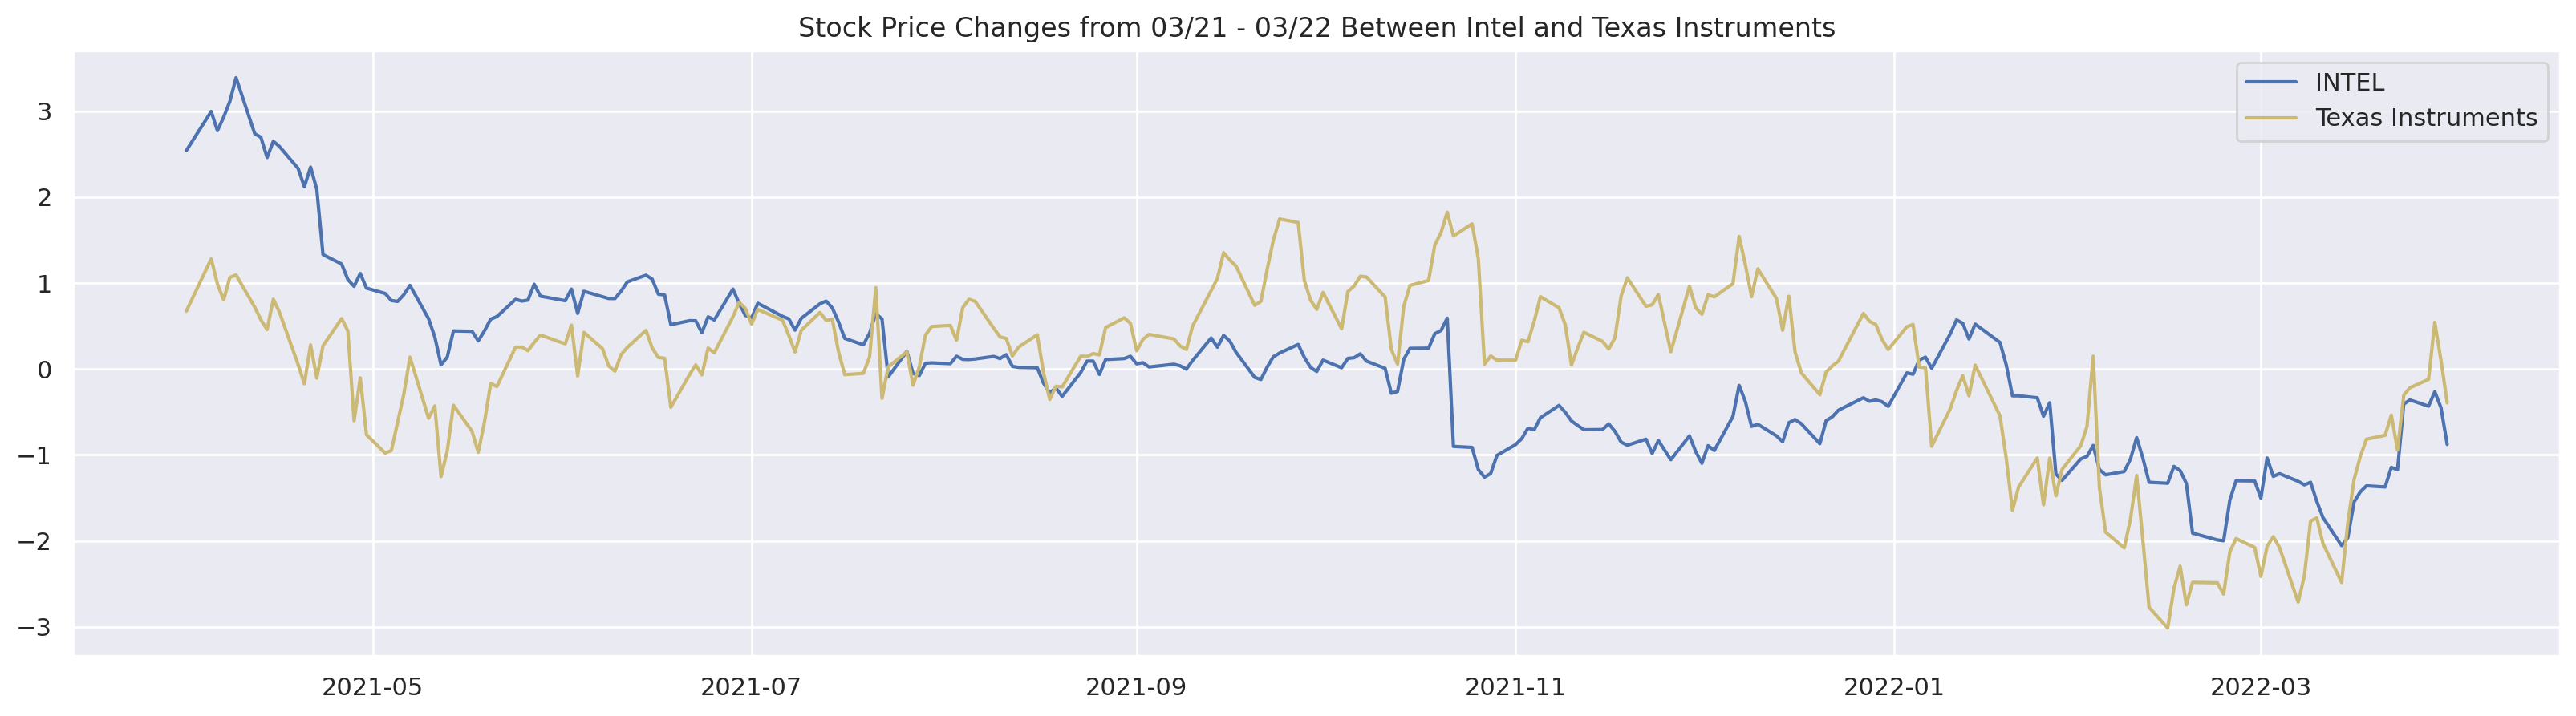

In [ ]:
figure(figsize=(20, 5), dpi=200)

X = df_new['Date']
Y1 = norm_new['INTC']
Y2 = norm_new['TXN']


plt.plot(X,Y1,color='B')
plt.plot(X,Y2,color='Y')



ocation = 0 # For the best location
legend_drawn_flag = True
plt.legend(["INTEL", "Texas Instruments"], loc=0, frameon=legend_drawn_flag)
plt.title("Stock Price Changes from 03/21 - 03/22 Between Intel and Texas Instruments")

plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


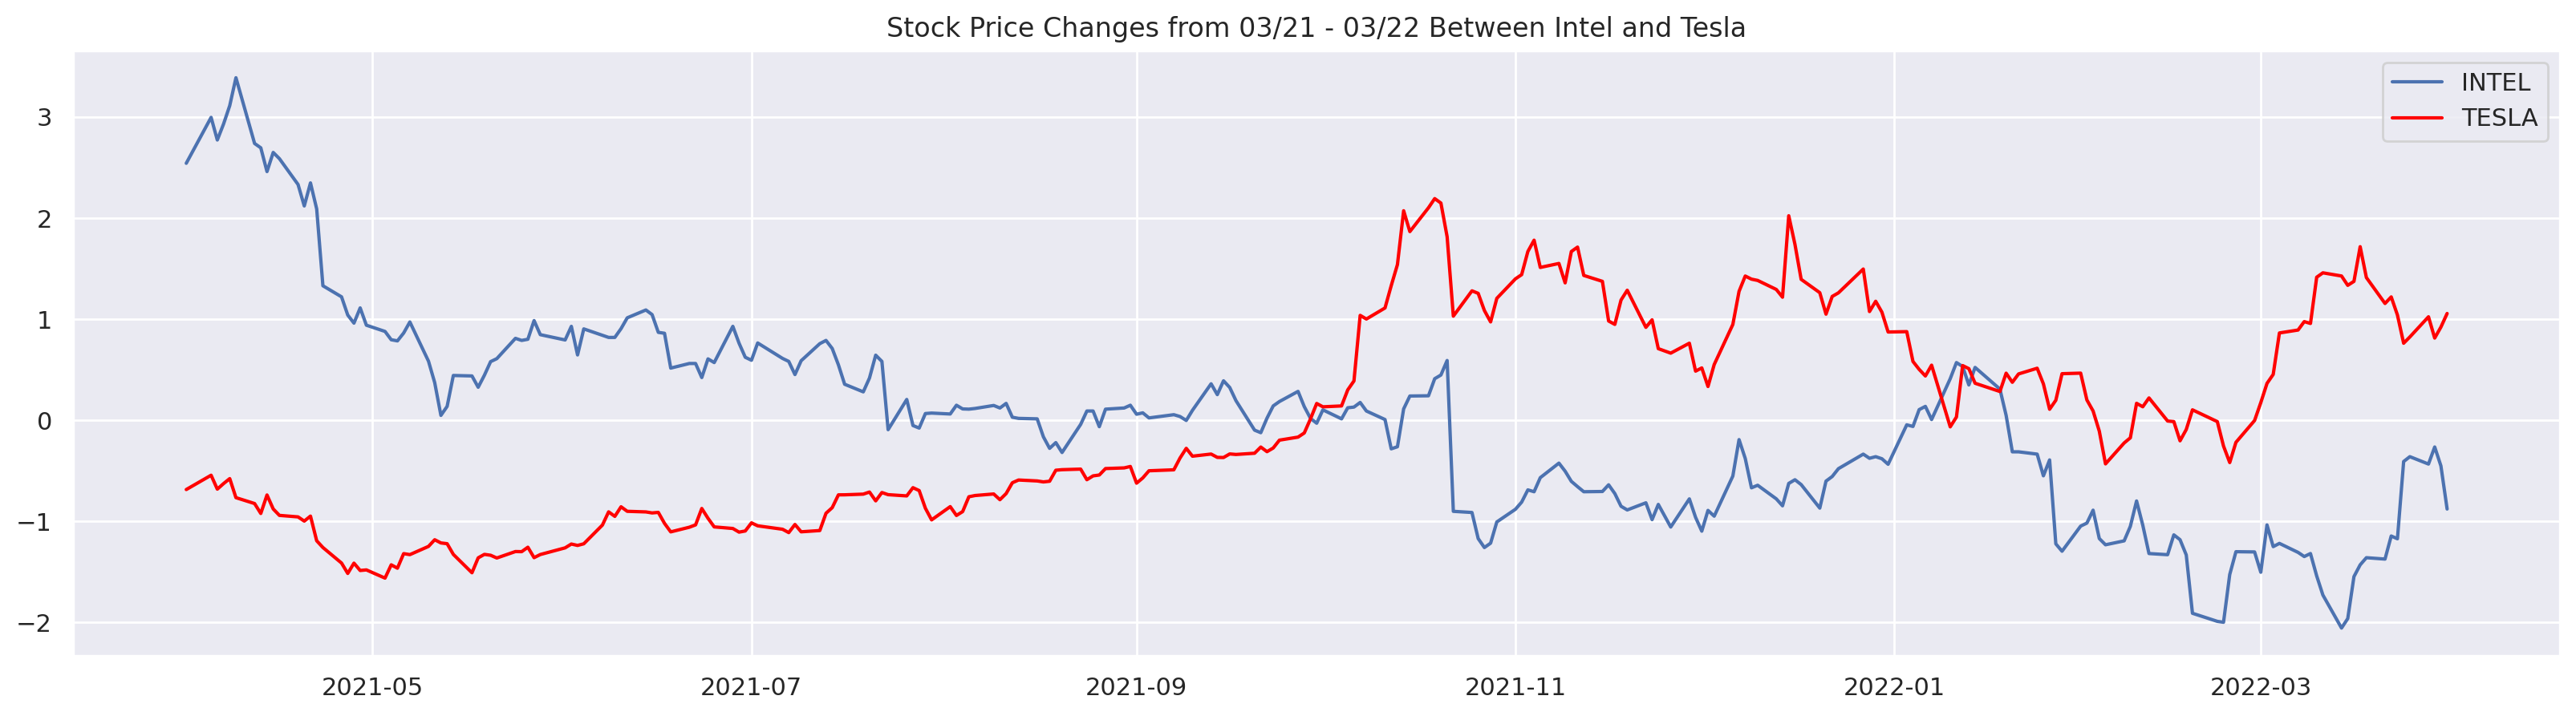

In [ ]:
figure(figsize=(20, 5), dpi=200)

X = df_new['Date']
Y1 = norm_new['INTC']
Y2 = norm_new['TSLA']


plt.plot(X,Y1,color='B')
plt.plot(X,Y2,color='RED')



ocation = 0 # For the best location
legend_drawn_flag = True
plt.legend(["INTEL", "TESLA"], loc=0, frameon=legend_drawn_flag)
plt.title("Stock Price Changes from 03/21 - 03/22 Between Intel and Tesla")

plt.show()

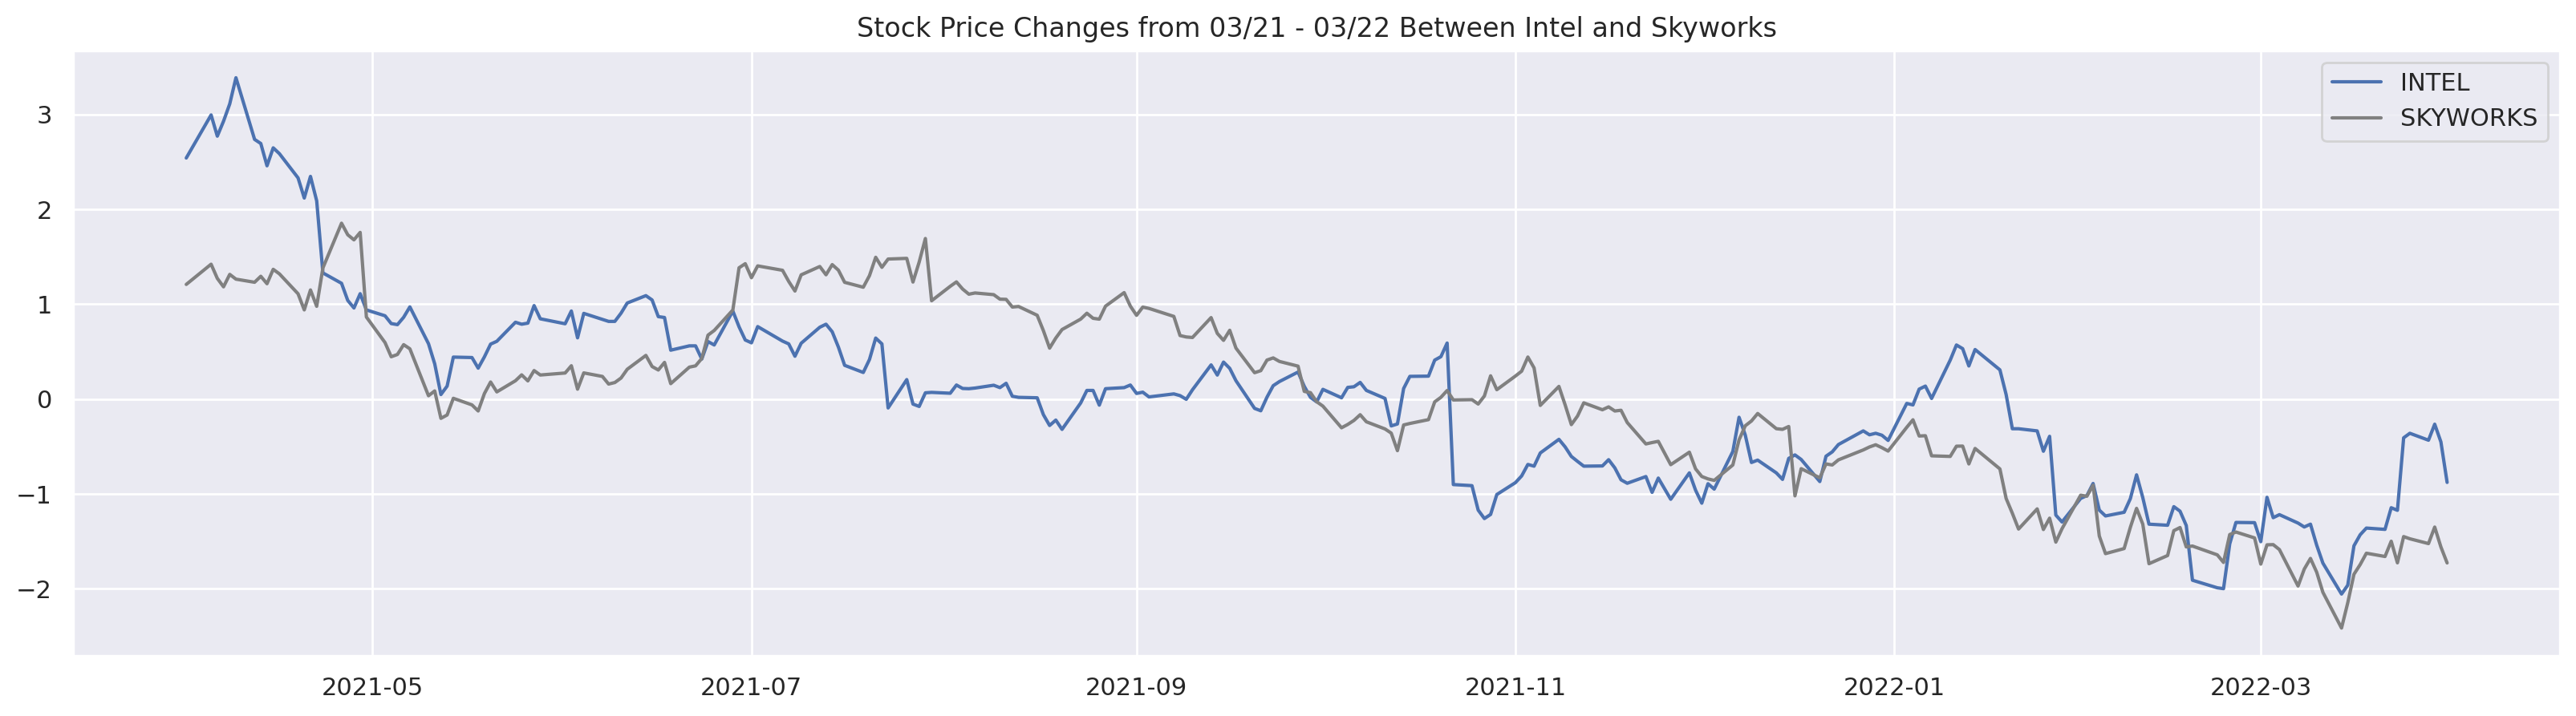

In [ ]:
figure(figsize=(20, 5), dpi=200)

X = df_new['Date']
Y1 = norm_new['INTC']
Y2 = norm_new['SWKS']


plt.plot(X,Y1,color='B')
plt.plot(X,Y2,color='Gray')



ocation = 0 # For the best location
legend_drawn_flag = True
plt.legend(["INTEL", "SKYWORKS"], loc=0, frameon=legend_drawn_flag)
plt.title("Stock Price Changes from 03/21 - 03/22 Between Intel and Skyworks")

plt.show()

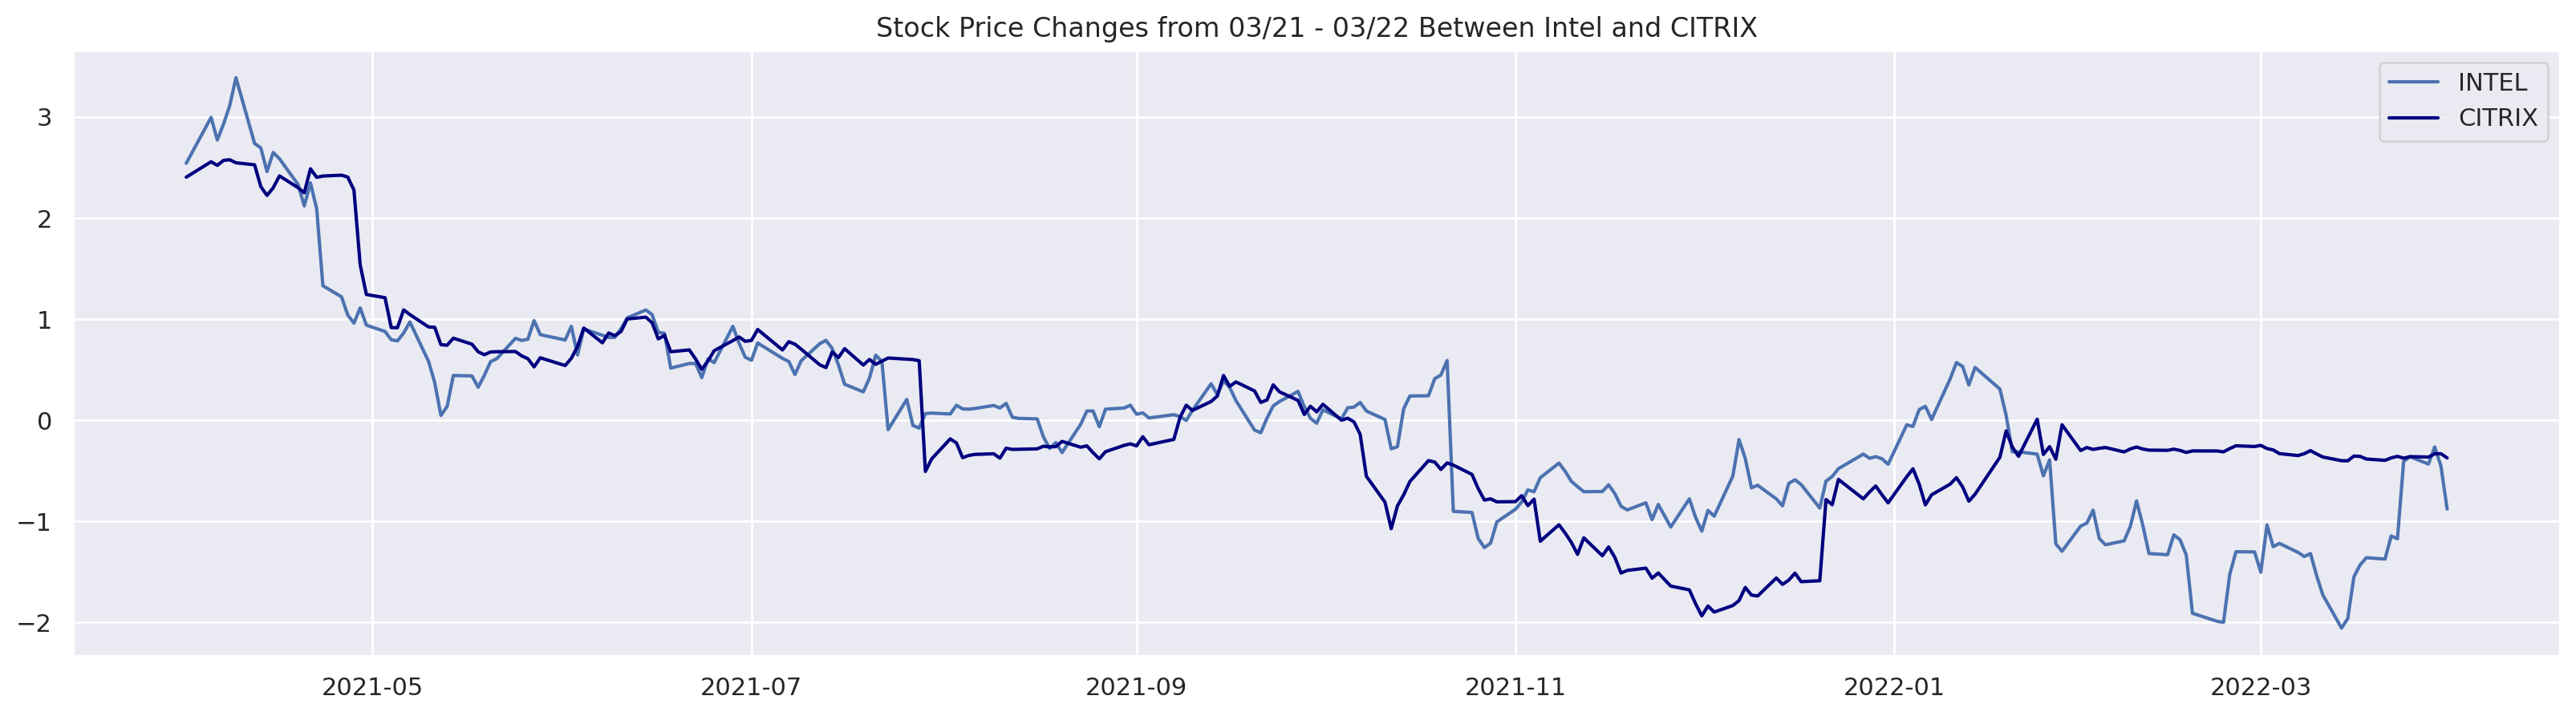

In [ ]:
figure(figsize=(20, 5), dpi=200)

X = df_new['Date']
Y1 = norm_new['INTC']
Y2 = norm_new['CTXS']


plt.plot(X,Y1,color='B')
plt.plot(X,Y2,color='Navy')



ocation = 0 # For the best location
legend_drawn_flag = True
plt.legend(["INTEL", "CITRIX"], loc=0, frameon=legend_drawn_flag)
plt.title("Stock Price Changes from 03/21 - 03/22 Between Intel and CITRIX")

plt.show()